In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [46]:
df = pd.read_csv('rn_20211111134924.csv', encoding='cp949', skiprows=6)
df

,날짜,지점,강수량(mm)
0,1990-01-01,108,0.0
1,1990-01-02,108,0.1
2,1990-01-03,108,NaN
3,1990-01-04,108,NaN
4,1990-01-05,108,3.2
...,...,...,...
11632,2021-11-06,108,NaN
11633,2021-11-07,108,NaN
11634,2021-11-08,108,25.7
11635,2021-11-09,108,2.0


In [47]:
df.dropna(inplace=True)

In [48]:
df

,날짜,지점,강수량(mm)
0,1990-01-01,108,0.0
1,1990-01-02,108,0.1
4,1990-01-05,108,3.2
8,1990-01-09,108,3.9
9,1990-01-10,108,16.7
...,...,...,...
11626,2021-10-31,108,0.7
11630,2021-11-04,108,0.0
11634,2021-11-08,108,25.7
11635,2021-11-09,108,2.0


In [50]:
import datetime
df['날짜'] = df['날짜'].astype('datetime64')
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day
df['계절'] = pd.cut(df.월,bins=[0,2,5,8,11,14],labels=['겨울','봄','여름','가을','겨울'], ordered=False)
df

,날짜,지점,강수량(mm),년도,월,일,계절
0,1990-01-01,108,0.0,1990,1,1,겨울
1,1990-01-02,108,0.1,1990,1,2,겨울
4,1990-01-05,108,3.2,1990,1,5,겨울
8,1990-01-09,108,3.9,1990,1,9,겨울
9,1990-01-10,108,16.7,1990,1,10,겨울
...,...,...,...,...,...,...,...
11626,2021-10-31,108,0.7,2021,10,31,가을
11630,2021-11-04,108,0.0,2021,11,4,가을
11634,2021-11-08,108,25.7,2021,11,8,가을
11635,2021-11-09,108,2.0,2021,11,9,가을


In [51]:
df['그룹'] = (df['년도'] // 10 * 10)
df

,날짜,지점,강수량(mm),년도,월,일,계절,그룹
0,1990-01-01,108,0.0,1990,1,1,겨울,1990
1,1990-01-02,108,0.1,1990,1,2,겨울,1990
4,1990-01-05,108,3.2,1990,1,5,겨울,1990
8,1990-01-09,108,3.9,1990,1,9,겨울,1990
9,1990-01-10,108,16.7,1990,1,10,겨울,1990
...,...,...,...,...,...,...,...,...
11626,2021-10-31,108,0.7,2021,10,31,가을,2020
11630,2021-11-04,108,0.0,2021,11,4,가을,2020
11634,2021-11-08,108,25.7,2021,11,8,가을,2020
11635,2021-11-09,108,2.0,2021,11,9,가을,2020


<AxesSubplot:xlabel='그룹', ylabel='계절'>

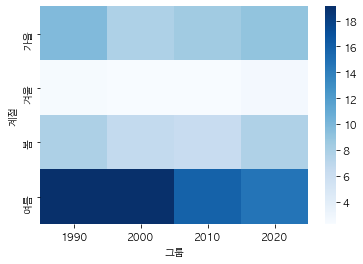

In [54]:
pivot_df = df.pivot_table('강수량(mm)','계절','그룹')
sns.heatmap(pivot_df,cmap='Blues')

<AxesSubplot:xlabel='년도', ylabel='계절'>

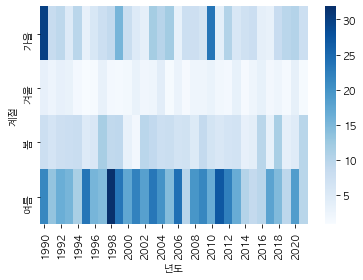

In [62]:
pivot_df = df.pivot_table('강수량(mm)','계절','년도')
sns.heatmap(pivot_df,cmap='Blues')

<AxesSubplot:xlabel='강수량(mm)', ylabel='월'>

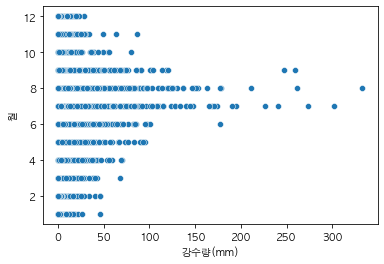

In [64]:
sns.scatterplot(x=df['강수량(mm)'],y=df['월'])

<AxesSubplot:xlabel='년도', ylabel='강수량(mm)'>

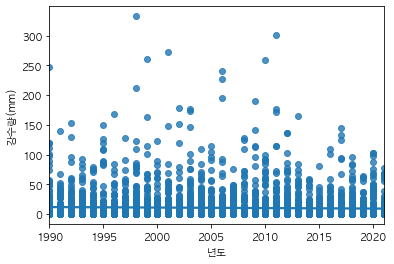

In [58]:
sns.regplot(x=df['년도'],y=df['강수량(mm)'])

<AxesSubplot:xlabel='그룹', ylabel='강수량(mm)'>

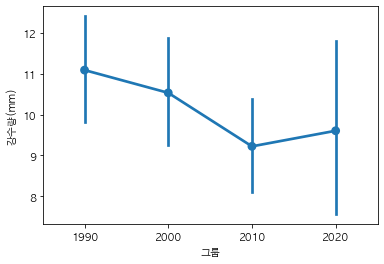

In [67]:
sns.pointplot(x=df['그룹'],y=df['강수량(mm)'])

- 분석 결과(서울기준)
- 1) 봄 보단 가을이 강수량이 높다.
- 2) 2010년 부터 강수량이 점점 줄어든다. 2020년은 데이터가 많지 않아서 정확하진 않다.
- 3) 2012년 부터 강수량이 줄어든것이 보인다.
- 4) 1998년 여름 가장 많은 비가 내렷다.